# Import library and get csv data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os


# 設定資料夾路徑
csv_folder = '/home/ubuntu/catkin_ws/src/turtlebot_sim/raw_data/'

# 列出目錄中所有的 CSV 檔案，包含子資料夾中的
csv_files = glob.glob(f'{csv_folder}/*/*.csv')

# 找到最新的 CSV 檔案
latest_csv_file = max(csv_files, key=os.path.getctime)
print(latest_csv_file)

# 提取檔案名稱
file_name = latest_csv_file.split('/')[-1].split('.')[0]
print(file_name)

# 提取檔案路徑資料夾
folder_name = latest_csv_file.split('/')[:-1]
folder_name = '/'.join(folder_name) + '/'
print(folder_name)

# 更新 csv_path
csv_path = latest_csv_file
# csv_path = '/home/ubuntu/catkin_ws/src/turtlebot_sim/raw_data/20230816210003.csv'

# 請根據實際檔案路徑進行修改
data = pd.read_csv(csv_path)

# 提取所需的數據列
timestamps = data['timestamp']
robot_0_x = data['robot_0_x']
robot_0_y = data['robot_0_y']
robot_0_theta = data['robot_0_theta']
robot_1_x = data['robot_1_x']
robot_1_y = data['robot_1_y']
robot_1_theta = data['robot_1_theta']
robot_2_x = data['robot_2_x']
robot_2_y = data['robot_2_y']
robot_2_theta = data['robot_2_theta']
relative_err_robot_1_x = data['relative_err_robot_1_x']
relative_err_robot_1_y = data['relative_err_robot_1_y']
relative_err_robot_1_theta = data['relative_err_robot_1_theta']
relative_err_robot_2_x = data['relative_err_robot_2_x']
relative_err_robot_2_y = data['relative_err_robot_2_y']
relative_err_robot_2_theta = data['relative_err_robot_2_theta']

# timestamp	robot_0_x	robot_0_y	robot_0_theta	robot_1_x	robot_1_y	robot_1_theta	robot_2_x	robot_2_y	robot_2_theta	relative_err_robot_1_x	relative_err_robot_1_y	relative_err_robot_1_theta	relative_err_robot_2_x	relative_err_robot_2_y	relative_err_robot_2_theta


/home/ubuntu/catkin_ws/src/turtlebot_sim/raw_data/fuzzy/20230822172024.csv
20230822172024
/home/ubuntu/catkin_ws/src/turtlebot_sim/raw_data/fuzzy/


# Plot trajectory of the robots

[[0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.8], [0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.7986487783486513], [0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.7972988697466278], [0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.7959502729179743], [0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.7946029865879752], [0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.7932570094831537], [0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.7919123403312707], [0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.7905689778613232], [0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.7892269208035433], [0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.7878861678893968], [0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.7865467178515828], [0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.7852085694240316], [0.121568627450980

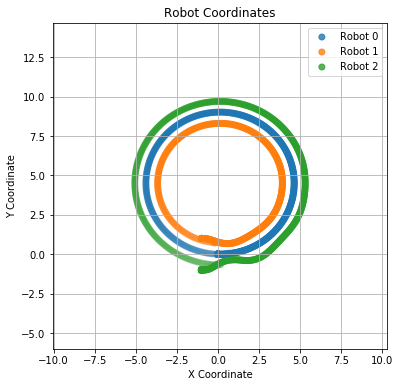

In [9]:

# 繪製座標點
plt.figure(figsize=(6, 6))
# plt.scatter(robot_0_x, robot_0_y, label='Robot 0')
# plt.scatter(robot_1_x, robot_1_y, label='Robot 1')
# plt.scatter(robot_2_x, robot_2_y, label='Robot 2')

# 生成透明度列表，根据数据点的位置逐渐增加透明度
num_points = len(robot_0_x)
# alphas = np.linspace(0.05, 0.8, num_points)

# Generate a custom opacity curve (non-linear)
alphas = np.exp(-np.linspace(0.1, 0.8, num_points))  # Exponential decay

# Normalize alphas to the desired range
min_alpha = 0.1
max_alpha = 0.8
alphas = min_alpha + (max_alpha - min_alpha) * (alphas - np.min(alphas)) / (np.max(alphas) - np.min(alphas))

# Create an array of RGBA tuples with varying alpha values
# blue #1f77b4 
# orange #ff7f0e
# green #2ca02c

blue_color = '#1f77b4'
orange_color = '#ff7f0e'
green_color = '#2ca02c'

def hex_to_rgb(hex_color):
    rgb_color = tuple(int(hex_color[i:i+2], 16) for i in (1, 3, 5))
    normalized_rgb_color = tuple(channel / 255 for channel in rgb_color)
    alpha = 0.3  # Your desired alpha value

    rgba_color = [*normalized_rgb_color, alpha]
    return rgba_color

colors_robot_0 = [[hex_to_rgb(blue_color)[0], hex_to_rgb(blue_color)[1], hex_to_rgb(blue_color)[2], alpha] for alpha in alphas]
colors_robot_1 = [[hex_to_rgb(orange_color)[0], hex_to_rgb(orange_color)[1], hex_to_rgb(orange_color)[2], alpha] for alpha in alphas]
colors_robot_2 = [[hex_to_rgb(green_color)[0], hex_to_rgb(green_color)[1], hex_to_rgb(green_color)[2], alpha] for alpha in alphas]
print(colors_robot_0)
# return

plt.scatter(robot_0_x, robot_0_y, label='Robot 0', color=colors_robot_0)
plt.scatter(robot_1_x, robot_1_y, label='Robot 1', color=colors_robot_1)
plt.scatter(robot_2_x, robot_2_y, label='Robot 2', color=colors_robot_2)

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Robot Coordinates')
plt.legend()
plt.grid()

# 調整座標範圍
data_array_x = [robot_0_x, robot_1_x, robot_2_x]
data_array_y = [robot_0_y, robot_1_y, robot_2_y]
# min_value = min(min(arr) for arr in data_array)
# max_value = max(max(arr) for arr in data_array)
min_value_x = min(min(arr) for arr in data_array_x)
max_value_x = max(max(arr) for arr in data_array_x)
min_value_y = min(min(arr) for arr in data_array_y)
max_value_y = max(max(arr) for arr in data_array_y)

plt.xlim([min_value_x - 5, max_value_x + 5])
plt.ylim([min_value_y - 5, max_value_y + 5])

# Save plot to csv_folder
plt.savefig(folder_name + file_name + '_robot_coordinates.png')

plt.show()



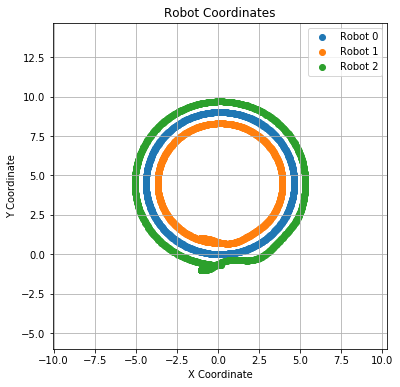

In [10]:

# 繪製座標點
plt.figure(figsize=(6, 6))
plt.scatter(robot_0_x, robot_0_y, label='Robot 0')
plt.scatter(robot_1_x, robot_1_y, label='Robot 1')
plt.scatter(robot_2_x, robot_2_y, label='Robot 2')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Robot Coordinates')
plt.legend()
plt.grid()

# 調整座標範圍
data_array_x = [robot_0_x, robot_1_x, robot_2_x]
data_array_y = [robot_0_y, robot_1_y, robot_2_y]
# min_value = min(min(arr) for arr in data_array)
# max_value = max(max(arr) for arr in data_array)
min_value_x = min(min(arr) for arr in data_array_x)
max_value_x = max(max(arr) for arr in data_array_x)
min_value_y = min(min(arr) for arr in data_array_y)
max_value_y = max(max(arr) for arr in data_array_y)

plt.xlim([min_value_x - 5, max_value_x + 5])
plt.ylim([min_value_y - 5, max_value_y + 5])

# Save plot to csv_folder
plt.savefig(folder_name + file_name + '_robot_coordinates.png')

plt.show()



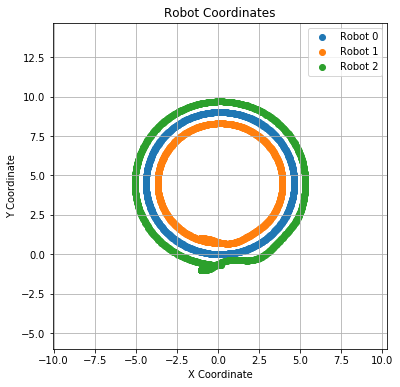

In [11]:

# 繪製座標點
plt.figure(figsize=(6, 6))
plt.scatter(robot_0_x, robot_0_y, label='Robot 0')
plt.scatter(robot_1_x, robot_1_y, label='Robot 1')
plt.scatter(robot_2_x, robot_2_y, label='Robot 2')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Robot Coordinates')
plt.legend()
plt.grid()

# 調整座標範圍
data_array_x = [robot_0_x, robot_1_x, robot_2_x]
data_array_y = [robot_0_y, robot_1_y, robot_2_y]
# min_value = min(min(arr) for arr in data_array)
# max_value = max(max(arr) for arr in data_array)
min_value_x = min(min(arr) for arr in data_array_x)
max_value_x = max(max(arr) for arr in data_array_x)
min_value_y = min(min(arr) for arr in data_array_y)
max_value_y = max(max(arr) for arr in data_array_y)

plt.xlim([min_value_x - 5, max_value_x + 5])
plt.ylim([min_value_y - 5, max_value_y + 5])

# Save plot to csv_folder
plt.savefig(folder_name + file_name + '_robot_coordinates.png')

plt.show()



# Plot relative error distance 

leader robot(robot_0) 

follower robot(robot_1, robot_2)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


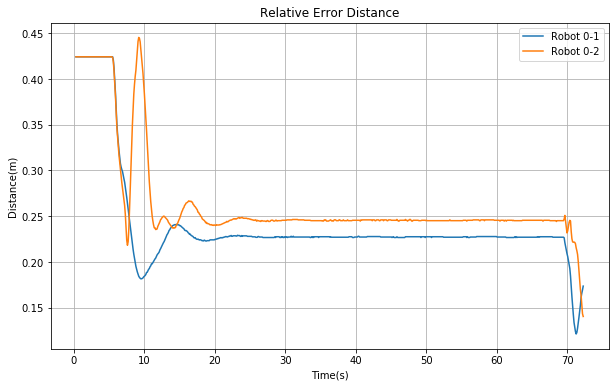

In [12]:
# plot relative error distance (m) vs. time (s) for (robot0 and robot1), (robot0 and robot2)

# Header 
# timestamp	
# robot_0_x	robot_0_y	robot_0_theta
# robot_1_x	robot_1_y	robot_1_theta	
# robot_2_x	robot_2_y	robot_2_theta	
# relative_err_robot_1_x	relative_err_robot_1_y	relative_err_robot_1_theta	
# relative_err_robot_2_x	relative_err_robot_2_y	relative_err_robot_2_theta

distance_robot_0_1 = np.sqrt(np.square(relative_err_robot_1_x) + np.square(relative_err_robot_1_y))
distance_robot_0_2 = np.sqrt(np.square(relative_err_robot_2_x) + np.square(relative_err_robot_2_y))

# 繪製距離錯誤圖
plt.figure(figsize=(10, 6))
plt.plot(timestamps, distance_robot_0_1, label='Robot 0-1')
plt.plot(timestamps, distance_robot_0_2, label='Robot 0-2')

plt.xlabel('Time(s)')
plt.ylabel('Distance(m)')
plt.title('Relative Error Distance')
plt.legend()
plt.grid()
# save figure
plt.savefig(folder_name + file_name + '_relative_error_distance.png')
plt.show()


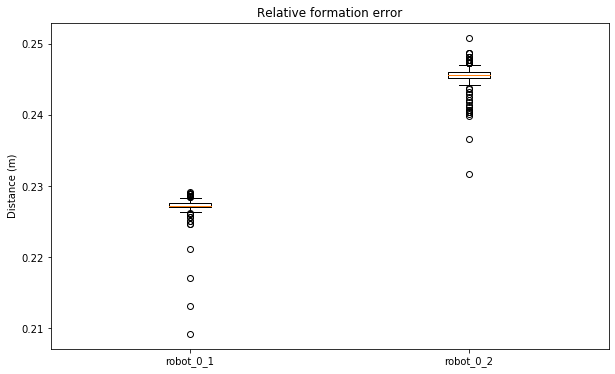

In [13]:
# Box plot - relative formation error (distance_robot_0_1, distance_robot_0_2)
fig, ax = plt.subplots(figsize=(10, 6))

# timestamps = data['timestamp']
# robot_0_x = data['robot_0_x']
# robot_0_y = data['robot_0_y']
# robot_0_theta = data['robot_0_theta']
# robot_1_x = data['robot_1_x']
# robot_1_y = data['robot_1_y']
# robot_1_theta = data['robot_1_theta']
# robot_2_x = data['robot_2_x']
# robot_2_y = data['robot_2_y']
# robot_2_theta = data['robot_2_theta']
# relative_err_robot_1_x = data['relative_err_robot_1_x']
# relative_err_robot_1_y = data['relative_err_robot_1_y']
# relative_err_robot_1_theta = data['relative_err_robot_1_theta']
# relative_err_robot_2_x = data['relative_err_robot_2_x']
# relative_err_robot_2_y = data['relative_err_robot_2_y']
# relative_err_robot_2_theta = data['relative_err_robot_2_theta']

# 選擇20-60s的資料
start_time = 20
end_time = 70
start_index = np.where(timestamps >= start_time)[0][0]
end_index = np.where(timestamps >= end_time)[0][0]

# robot_0_1
distance_robot_0_1 = distance_robot_0_1[start_index:end_index]

# robot_0_2
distance_robot_0_2 = distance_robot_0_2[start_index:end_index]


ax.boxplot([distance_robot_0_1, distance_robot_0_2], labels=['robot_0_1', 'robot_0_2'])
ax.set_title('Relative formation error')
ax.set_ylabel('Distance (m)')
plt.show()

# save plt
fig.savefig(folder_name + file_name + '_relative_formation_error.png')


